<a href="https://colab.research.google.com/github/anieszt/Cifar10_CNN/blob/main/cifar10_wameedh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import regularizers

In [2]:
(train_img, train_labels), (test_img, test_labels) = tf.keras.datasets.cifar10.load_data()

model = tf.keras.models.Sequential() 

model.add(tf.keras.layers.BatchNormalization(input_shape=train_img.shape[1:]))
model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='elu'))
model.add(tf.keras.layers.BatchNormalization(input_shape=train_img.shape[1:]))       
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides = (2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.BatchNormalization(input_shape=train_img.shape[1:]))
model.add(tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='elu'))
model.add(tf.keras.layers.BatchNormalization(input_shape=train_img.shape[1:])) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(1,1), strides = (1,1)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.BatchNormalization(input_shape=train_img.shape[1:]))
model.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='elu')) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(1,1), strides = (1,1)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
model.add(tf.keras.layers.BatchNormalization(input_shape=train_img.shape[1:]))
model.add(tf.keras.layers.Dense(500,kernel_regularizer=regularizers.l2(0.01),activation="elu"))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(256,activation = 'elu',kernel_regularizer=regularizers.l2(0.01), input_shape=(32,32)))  #
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model.summary()


170498071/170498071 [==============================] - 14s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 32, 32, 3)        12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        4864      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)       

In [ ]:
tf.keras.backend.clear_session()

def scheduler(epoch, lr):
   if epoch < 10:
     return lr
   elif epoch > 10 and epoch < 19:
     return lr * tf.math.exp(-0.1)
   else:
     return lr * tf.math.exp(-0.14)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0007), #0.0007
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

#report = [tf.keras.callbacks.ModelCheckpoint(filepath='model.h5', verbose = 1)]
report = [tf.keras.callbacks.LearningRateScheduler(scheduler)]

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [ ]:
history = model.fit(train_img, train_labels, callbacks = report, epochs = 30, batch_size=64, validation_data=(test_img, test_labels)) 

Epoch 1/30
782/782 [==============================] - 32s 37ms/step - loss: 11.0007 - accuracy: 0.3752 - val_loss: 4.1384 - val_accuracy: 0.5292 - lr: 7.0000e-04
Epoch 2/30
782/782 [==============================] - 28s 36ms/step - loss: 3.4141 - accuracy: 0.5315 - val_loss: 2.7851 - val_accuracy: 0.5547 - lr: 7.0000e-04
Epoch 3/30
782/782 [==============================] - 28s 36ms/step - loss: 2.3790 - accuracy: 0.5824 - val_loss: 2.1628 - val_accuracy: 0.5971 - lr: 7.0000e-04
Epoch 4/30
782/782 [==============================] - 28s 36ms/step - loss: 2.2345 - accuracy: 0.6150 - val_loss: 2.3458 - val_accuracy: 0.6285 - lr: 7.0000e-04
Epoch 5/30
782/782 [==============================] - 28s 36ms/step - loss: 2.6656 - accuracy: 0.6438 - val_loss: 2.9373 - val_accuracy: 0.6605 - lr: 7.0000e-04
Epoch 6/30
782/782 [==============================] - 28s 36ms/step - loss: 3.1548 - accuracy: 0.6634 - val_loss: 3.2904 - val_accuracy: 0.6895 - lr: 7.0000e-04
Epoch 7/30
782/782 [=============

In [ ]:
test_loss, test_acc = model.evaluate(test_img, test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 0.8432 - accuracy: 0.8527


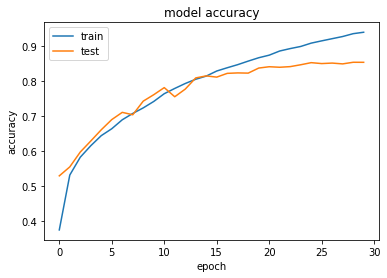

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test','loss'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 266ms/step
prediction: dog


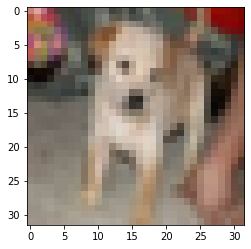

In [ ]:
import random

n=random.randint(1, 10000)

labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
model.save("model.h5")
model = tf.keras.models.load_model(filepath="model.h5")
output=model.predict(test_img[n].reshape(1,32,32,3))

plt.imshow(test_img[n], cmap= 'binary')
print("prediction: " +labels[np.argmax(output)])